In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
import os

In [26]:
dataset = pd.read_csv(r'D:\odi.csv')

In [27]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [28]:
# Preview stats for each columns
dataset.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


In [29]:
dataset.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [30]:
 dataset.groupby("bat_team")["runs"].mean()

bat_team
Afghanistan             103.719725
Asia XI                 150.514989
Australia               122.956547
Bangladesh              105.383375
Bermuda                  86.493213
Canada                   94.619701
England                 120.585727
Hong Kong               100.560976
India                   125.675789
Ireland                 103.182362
Kenya                    84.564852
Netherlands              92.863177
New Zealand             118.863359
Pakistan                114.268115
Papua New Guinea        110.830986
Scotland                102.031166
South Africa            124.920405
Sri Lanka               116.667119
United Arab Emirates    103.675474
West Indies             103.824277
Zimbabwe                 93.753860
Name: runs, dtype: float64

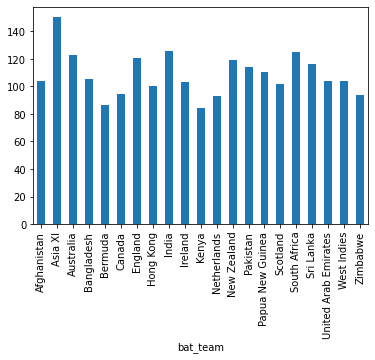

In [31]:
Groups = dataset.groupby("bat_team")["runs"].mean()
Groups.plot.bar()

In [32]:
dataset.shape

(350899, 15)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [34]:
dataset.dropna(inplace = True)

In [35]:
dataset.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [36]:
# Checking the percentage of missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

mid               0.0
date              0.0
venue             0.0
bat_team          0.0
bowl_team         0.0
batsman           0.0
bowler            0.0
runs              0.0
wickets           0.0
overs             0.0
runs_last_5       0.0
wickets_last_5    0.0
striker           0.0
non-striker       0.0
total             0.0
dtype: float64

In [37]:
#finding categorical columns
cols = dataset.columns
num_cols = dataset._get_numeric_data().columns
list(set(cols) - set(num_cols))

['bowler', 'date', 'bat_team', 'batsman', 'bowl_team', 'venue']

In [43]:
cat_dataset = dataset.select_dtypes(include=['object']).copy()
cat_dataset.head()

,date,venue,bat_team,bowl_team,batsman,bowler
0,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
2,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
3,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston
4,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston


In [52]:
cat_dataset_onehot_sklearn = cat_dataset.copy()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['bowl_team'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['bowler'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results = lb.fit_transform(cat_dataset_onehot_sklearn['batsman'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)


In [44]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

X = dataset.iloc[:,[7,8,9,12,13]].values
y = dataset.iloc[:, 14].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

# Testing the dataset on trained model
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))


R square value: 52.737657811129445
Custom accuracy: 43.354801937874036


In [47]:
# Training the dataset
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(X_train,y_train)
# Testing the dataset on trained model
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))



R square value: 79.54237788001757
Custom accuracy: 77.04645198062126


In [49]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
# Testing the dataset on trained model
y_pred = regressor.predict(X_test)
score = regressor.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))


R square value: 67.88262051079485
Custom accuracy: 78.74608150470219
